<a href="https://colab.research.google.com/github/TEJASWI0G/Stock_analysis_MS/blob/main/Microsoft_Stock_Forecasting_with_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#dataset @ https://finance.yahoo.com/quote/MSFT/history/

In [ ]:
import pandas as pd
df =  pd.read_csv('MSFT.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-02-01,248.000000,255.179993,245.470001,252.750000,250.528580,31259900
1,2023-02-02,258.820007,264.690002,257.250000,264.600006,262.274445,39940400
2,2023-02-03,259.540009,264.200012,257.100006,258.350006,256.079376,29077300
3,2023-02-06,257.440002,258.299988,254.779999,256.769989,254.513229,22518000
4,2023-02-07,260.529999,268.769989,260.079987,267.559998,265.208405,50841400
...,...,...,...,...,...,...,...
247,2024-01-26,404.369995,406.170013,402.429993,403.929993,403.929993,17803300
248,2024-01-29,406.059998,409.980011,404.329987,409.720001,409.720001,24510200
249,2024-01-30,412.260010,413.049988,406.450012,408.589996,408.589996,33477600
250,2024-01-31,406.959991,415.320007,397.209991,397.579987,397.579987,47871100


In [ ]:
df = df[['Date','Close']]
df

,Date,Close
0,2023-02-01,252.750000
1,2023-02-02,264.600006
2,2023-02-03,258.350006
3,2023-02-06,256.769989
4,2023-02-07,267.559998
...,...,...
247,2024-01-26,403.929993
248,2024-01-29,409.720001
249,2024-01-30,408.589996
250,2024-01-31,397.579987


In [ ]:
df['Date']


0      2023-02-01
1      2023-02-02
2      2023-02-03
3      2023-02-06
4      2023-02-07
          ...    
247    2024-01-26
248    2024-01-29
249    2024-01-30
250    2024-01-31
251    2024-02-01
Name: Date, Length: 252, dtype: object

In [ ]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year = year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [ ]:
df

,Date,Close
0,2023-02-01,252.750000
1,2023-02-02,264.600006
2,2023-02-03,258.350006
3,2023-02-06,256.769989
4,2023-02-07,267.559998
...,...,...
247,2024-01-26,403.929993
248,2024-01-29,409.720001
249,2024-01-30,408.589996
250,2024-01-31,397.579987


In [ ]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-20-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0     2023-02-01
1     2023-02-02
2     2023-02-03
3     2023-02-06
4     2023-02-07
         ...    
247   2024-01-26
248   2024-01-29
249   2024-01-30
250   2024-01-31
251   2024-02-01
Name: Date, Length: 252, dtype: datetime64[ns]

In [ ]:
df

,Date,Close
0,2023-02-01,252.750000
1,2023-02-02,264.600006
2,2023-02-03,258.350006
3,2023-02-06,256.769989
4,2023-02-07,267.559998
...,...,...
247,2024-01-26,403.929993
248,2024-01-29,409.720001
249,2024-01-30,408.589996
250,2024-01-31,397.579987


In [ ]:
df.index = df.pop('Date')
df

,Close
Date,
2023-02-01,252.750000
2023-02-02,264.600006
2023-02-03,258.350006
2023-02-06,256.769989
2023-02-07,267.559998
...,...
2024-01-26,403.929993
2024-01-29,409.720001
2024-01-30,408.589996


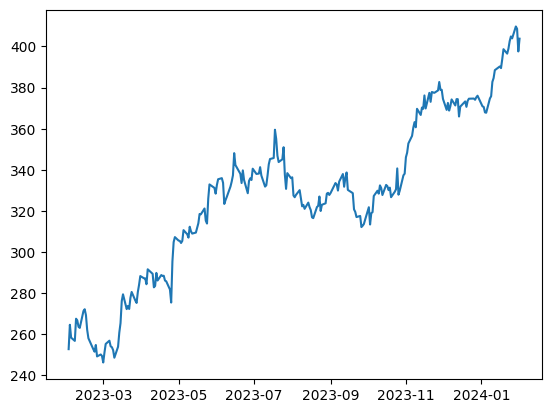

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [ ]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2024-02-01'
windowed_df = df_to_windowed_df(df,
                                '2023-02-06',
                                '2024-02-01',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2023-02-06,252.750000,264.600006,258.350006,256.769989
1,2023-02-07,264.600006,258.350006,256.769989,267.559998
2,2023-02-08,258.350006,256.769989,267.559998,266.730011
3,2023-02-09,256.769989,267.559998,266.730011,263.619995
4,2023-02-10,267.559998,266.730011,263.619995,263.100006
...,...,...,...,...,...
244,2024-01-26,398.899994,402.559998,404.869995,403.929993
245,2024-01-29,402.559998,404.869995,403.929993,409.720001
246,2024-01-30,404.869995,403.929993,409.720001,408.589996
247,2024-01-31,403.929993,409.720001,408.589996,397.579987


In [ ]:
def windowed_df_to_date_X_y(windowed_dateframe):
  df_as_np = windowed_dateframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1: -1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((249,), (249, 3, 1), (249,))

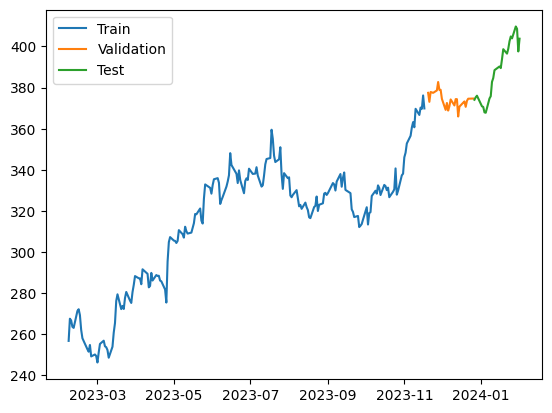

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

In [ ]:
model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation = 'relu'),
                    layers.Dense(32, activation = 'relu'),
                    layers.Dense(1)])
model.compile(loss = 'mse',
              optimizer = Adam(learning_rate = 0.001),
              metrics = ['mean_absolute_error'])
model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 100)

Epoch 1/100
7/7 [==============================] - 4s 106ms/step - loss: 99683.7578 - mean_absolute_error: 314.2260 - val_loss: 139843.2344 - val_mean_absolute_error: 373.9378
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 99427.4141 - mean_absolute_error: 313.8172 - val_loss: 139631.0000 - val_mean_absolute_error: 373.6539
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 99249.0859 - mean_absolute_error: 313.5331 - val_loss: 139446.1094 - val_mean_absolute_error: 373.4064
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 99092.8828 - mean_absolute_error: 313.2849 - val_loss: 139237.1562 - val_mean_absolute_error: 373.1265
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 98902.8438 - mean_absolute_error: 312.9798 - val_loss: 138966.2656 - val_mean_absolute_error: 372.7633
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 98611.6875 - mean_absolute_error: 312.5130 - val_loss: 

7/7 [==============================] - 1s 4ms/step


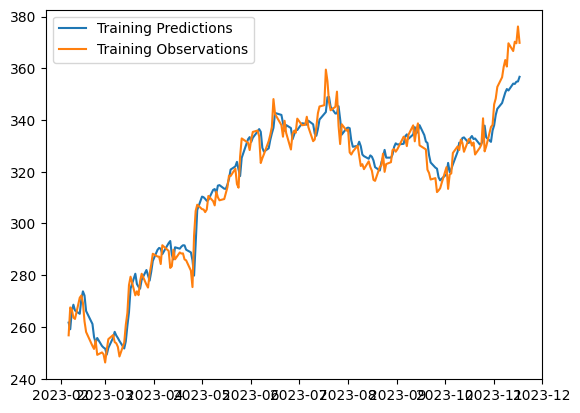

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 21ms/step


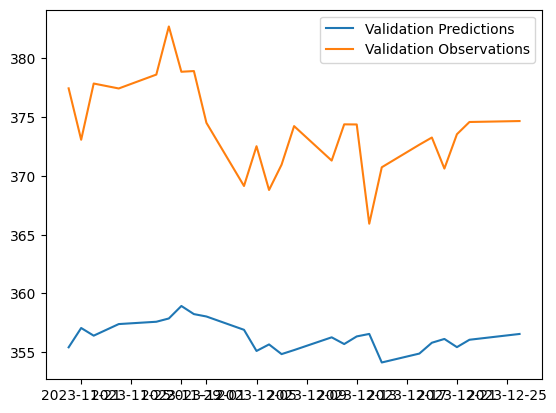

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 27ms/step


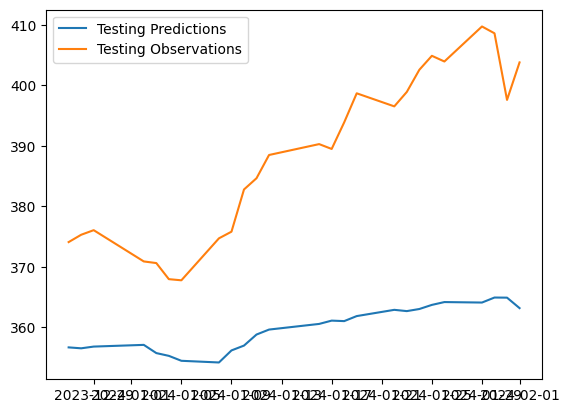

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

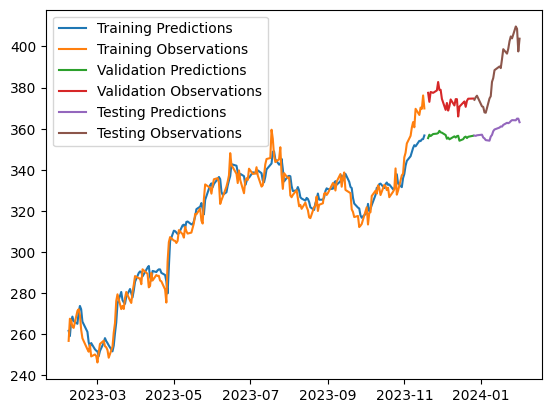

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 'Training Observations',
            'Validation Predictions', 'Validation Observations',
            'Testing Predictions', 'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions. append(next_prediction)
  last_window[-1] = next_prediction



1/1 [==============================] - 0s 21ms/step


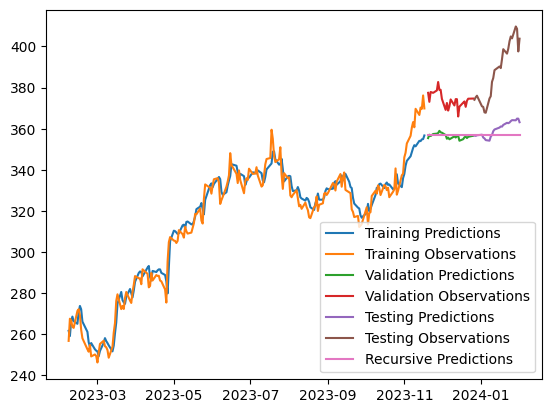

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions )
plt.legend(['Training Predictions', 'Training Observations',
            'Validation Predictions', 'Validation Observations',
            'Testing Predictions', 'Testing Observations',
            'Recursive Predictions'])